In [1]:
import math
import random
import matplotlib.pyplot as plt

In [2]:
class PoissonDistribution:
    def __init__(self, mean, upper_bound):
        self.mean = mean
        self.upper_bound = upper_bound
        self.samples = None

    def generate_samples(self, sample_size):
        # Генерация выборки с использованием распределения Пуассона
        self.samples = [self.generate_poisson_sample() for _ in range(sample_size)]

    def generate_poisson_sample(self):
        # Алгоритм генерации числа из распределения Пуассона
        L = math.exp(-self.mean)
        k = 0
        p = 1
        while p > L:
            k += 1
            p *= random.uniform(0, 1)
        return min(k - 1, self.upper_bound)

    def calculate_statistics(self):
        if self.samples is not None:
            mean = sum(self.samples) / len(self.samples)
            variance = sum((x - mean) ** 2 for x in self.samples) / len(self.samples)
            std_deviation = math.sqrt(variance)
            return mean, variance, std_deviation
        else:
            raise ValueError("Generate samples first.")

    def plot_distribution(self):
        if self.samples is not None:
            plt.hist(self.samples, bins=range(self.upper_bound + 1), align='left', edgecolor='black')
            plt.title(f'Poisson Distribution Plot (Mean: {self.mean}, Upper Bound: {self.upper_bound})')
            plt.xlabel('Values')
            plt.ylabel('Frequency')
            plt.show()
        else:
            raise ValueError("Generate samples first.")

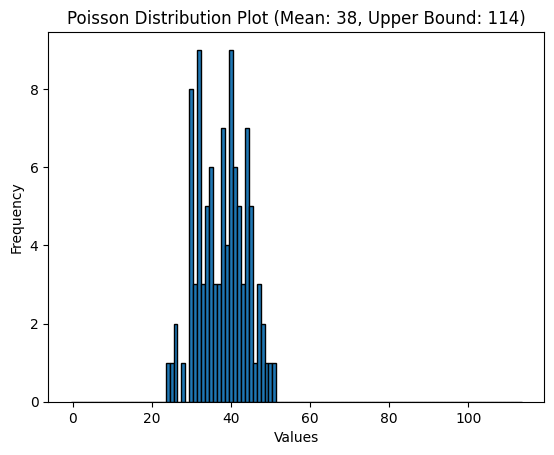

Mean: 37.81, Variance: 36.43389999999999, Std Deviation: 6.036050032927162


In [3]:
mean_value = 38
upper_bound_value = 114
sample_size_value = 100

poisson_dist = PoissonDistribution(mean_value, upper_bound_value)
poisson_dist.generate_samples(sample_size_value)
poisson_dist.plot_distribution()

statistics = poisson_dist.calculate_statistics()
print(f"Mean: {statistics[0]}, Variance: {statistics[1]}, Std Deviation: {statistics[2]}")


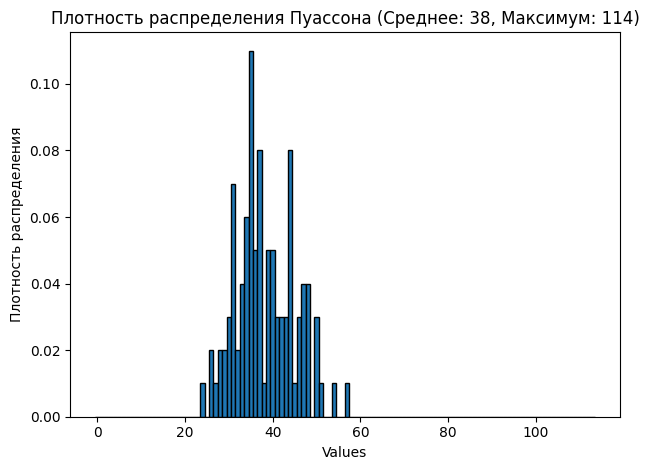

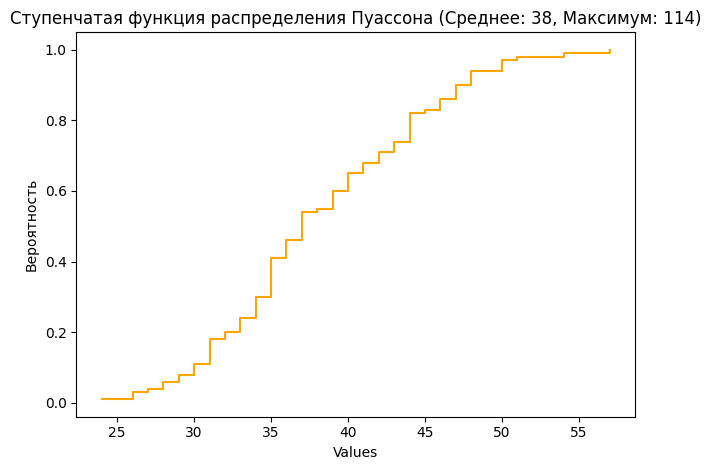

Mean: 38.23, Variance: 45.3771, Std Deviation: 6.736252667470246


In [4]:
import random
import matplotlib.pyplot as plt
import math

class PoissonDistribution:
    def __init__(self, mean, upper_bound):
        self.mean = mean
        self.upper_bound = upper_bound
        self.samples = None
        self.cdf_values = None

    def generate_samples(self, sample_size):
        # Генерация выборки с использованием распределения Пуассона
        self.samples = [self.generate_poisson_sample() for _ in range(sample_size)]
        # Сортируем значения для вычисления CDF
        self.samples.sort()
        # Вычисляем CDF
        self.calculate_cdf()

    def generate_poisson_sample(self):
        # Алгоритм генерации числа из распределения Пуассона
        L = math.exp(-self.mean)
        k = 0
        p = 1
        while p > L:
            k += 1
            p *= random.uniform(0, 1)
        return min(k - 1, self.upper_bound)

    def calculate_statistics(self):
        if self.samples is not None:
            mean = sum(self.samples) / len(self.samples)
            variance = sum((x - mean) ** 2 for x in self.samples) / len(self.samples)
            std_deviation = math.sqrt(variance)
            return mean, variance, std_deviation
        else:
            raise ValueError("Generate samples first.")

    def calculate_cdf(self):
        if self.samples is not None:
            unique_values, counts = self.get_value_counts()
            cumulative_counts = [sum(counts[:i + 1]) for i in range(len(counts))]
            self.cdf_values = [count / len(self.samples) for count in cumulative_counts]

    def get_value_counts(self):
        unique_values, counts = [], []
        current_value, current_count = self.samples[0], 0
        for value in self.samples:
            if value == current_value:
                current_count += 1
            else:
                unique_values.append(current_value)
                counts.append(current_count)
                current_value, current_count = value, 1
        unique_values.append(current_value)
        counts.append(current_count)
        return unique_values, counts

    def plot_distribution(self):
        if self.samples is not None and self.cdf_values is not None:
            plt.hist(self.samples, bins=range(self.upper_bound + 1), align='left', edgecolor='black', density=True)
            plt.title(f'Плотность распределения Пуассона (Среднее: {self.mean}, Максимум: {self.upper_bound})')
            plt.xlabel('Values')
            plt.ylabel('Плотность распределения')

            plt.tight_layout()
            plt.show()
        else:
            raise ValueError("Generate samples first.")
        
    def plot_cumulative_distribution(self):
        if self.samples is not None and self.cdf_values is not None:
            plt.step(self.get_value_counts()[0], self.cdf_values, where='post', color='orange')
            plt.title(f'Cтупенчатая функция распределения Пуассона (Среднее: {self.mean}, Максимум: {self.upper_bound})')
            plt.xlabel('Values')
            plt.ylabel('Вероятность')
            plt.tight_layout()
            plt.show()
            
            

# Пример использования
mean_value = 38
upper_bound_value = 114
sample_size_value = 100

poisson_dist = PoissonDistribution(mean_value, upper_bound_value)
poisson_dist.generate_samples(sample_size_value)
poisson_dist.plot_distribution()
poisson_dist.plot_cumulative_distribution()

statistics = poisson_dist.calculate_statistics()
print(f"Mean: {statistics[0]}, Variance: {statistics[1]}, Std Deviation: {statistics[2]}")

